<a href="https://colab.research.google.com/github/LuccaRomagnolli/Neural-Networks/blob/main/Multi_layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron (MLP)

A **Multi-Layer Perceptron (MLP)** is a type of artificial neural network composed of multiple layers of neurons. It is one of the most basic forms of deep learning models and is commonly used for classification and regression tasks.

## Structure

An MLP consists of:

- `Input Layer`: Receives the input features.
- `Hidden Layer(s)`: One or more layers where computations are performed. Each neuron applies a weighted sum followed by an activation function (like ReLU, sigmoid, or tanh).
- `Output Layer`: Produces the final result (e.g., class probabilities or regression output).

Each neuron in a layer is connected to all neurons in the previous and next layers — this is called a **fully connected** or **dense** layer.


## Example Use Case

MLPs can be used for tasks like:
- Image classification
- Sentiment analysis
- Predicting house prices

## Key Points

- MLPs are suitable for **structured data** (tables, vectors).
- They are **not ideal** for sequence or image data (where CNNs or RNNs are preferred), unless the data is preprocessed appropriately.
- Requires data normalization and proper tuning of hyperparameters (e.g., number of layers, neurons, learning rate).

## Simple Diagram

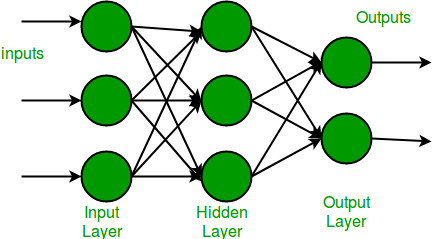

# Example using the MNIST dataset
### Dataset summary: https://en.wikipedia.org/wiki/MNIST_database

In [ ]:
# Import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize image pixel using grayscale
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

In [ ]:
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


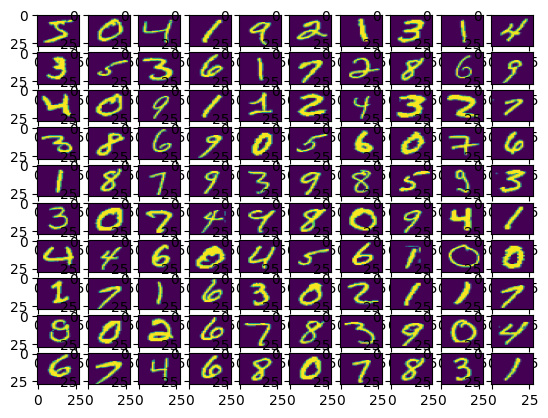

In [ ]:
# Visualising 100 imagens from the training data
fig, ax = plt.subplots(10, 10) #subplot create a graph with n subplots
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()

In [ ]:
# Build a neural network

model = tf.keras.models.Sequential({
    tf.keras.layers.Flatten(input_shape=(28,28)), # data augmentation layer
    Dense(256,activation='sigmoid'), # hidden layer 1
    Dense(128,activation='sigmoid'), # hidden layer 2
    Dense(10,activation='softmax') # output layer

})

model.compile(
    optimizer='adam', # refine the weights and biases during training
    loss='sparse_categorical_crossentropy', #compares the predicted output to the actual label
    metrics=['accuracy'] # how well the model can generalize
)

history = model.fit(x_train, y_train, epochs=20, batch_size=2000, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.0011 - loss: 8.5330 - val_accuracy: 0.0053 - val_loss: 7.4584
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0065 - loss: 7.1318 - val_accuracy: 0.0044 - val_loss: 6.3015
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0031 - loss: 6.1483 - val_accuracy: 0.0000e+00 - val_loss: 5.8549
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 5.8164 - val_accuracy: 0.0000e+00 - val_loss: 5.7413
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 5.7288 - val_accuracy: 0.0000e+00 - val_loss: 5.7018
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 5.6959 - val_accuracy: 0.0000e+00 - val_loss: 5.6825
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 5.6790 - val_accuracy: 0.0000e+00 - val_loss: 5.6711
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 -

In [ ]:
results = model.evaluate(x_test, y_test)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1148 - loss: 5.6390
Test Loss: 5.6385931968688965
Test Accuracy: 0.11240000277757645


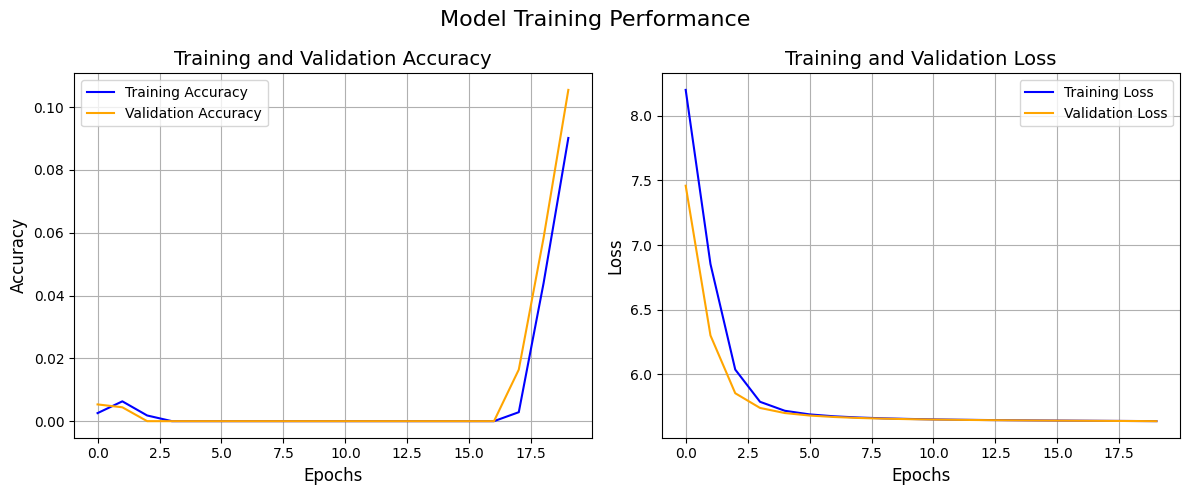

In [ ]:
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()